# Week 3 Notes: Support Vector Machine (SVM)

COMP SCI 465-0001 | Spring 2026

Reference: [GeeksforGeeks - SVM Algorithm](https://www.geeksforgeeks.org/machine-learning/support-vector-machine-algorithm/)

## What is SVM?

**Support Vector Machine (SVM)** is a supervised machine learning algorithm used for **classification** and **regression** tasks. It finds the best boundary (hyperplane) that separates different classes in the data.

- **Best for:** Binary classification (spam vs. not spam, cat vs. dog)
- **Main goal:** Maximize the **margin** between the two classes
- **Key idea:** The larger the margin, the better the model generalizes to new, unseen data

## Key Concepts

| Term | Definition |
|------|-------------|
| **Hyperplane** | Decision boundary separating classes. For linear classification: $w^Tx + b = 0$ |
| **Support Vectors** | The closest data points to the hyperplane — they define the margin |
| **Margin** | Distance between the hyperplane and support vectors. SVM maximizes this |
| **Kernel** | Function that maps data to higher dimensions for non-linear separation |
| **Hard Margin** | Perfect separation; no misclassifications allowed |
| **Soft Margin** | Allows some misclassifications using slack variables $\zeta_i$ |
| **C** | Regularization parameter: higher C = stricter penalty for misclassifications |
| **Hinge Loss** | Loss function that penalizes margin violations and misclassifications |
| **Dual Problem** | Solves using Lagrange multipliers; enables the kernel trick |

## How SVM Works

1. **Find the best hyperplane** that separates two classes by maximizing the margin
2. **Support vectors** are the nearest points to the hyperplane on each side
3. **Hard margin:** Perfect separation — choose L2 (largest margin) among possible hyperplanes
4. **Outliers:** SVM is robust — it ignores outliers and finds the best hyperplane anyway
5. **Soft margin:** When data isn't perfectly separable, allow some violations to improve generalization

**Objective (soft margin):**
$$\text{Objective} = \frac{1}{\text{margin}} + \lambda \sum \text{penalty}$$

## Non-Linearly Separable Data: Kernels

When data cannot be separated by a straight line, SVM uses **kernels** to map data into a higher-dimensional space where it becomes linearly separable.

| Kernel | Use Case |
|--------|----------|
| **Linear** | Data is linearly separable |
| **Polynomial** | Maps data into polynomial space |
| **RBF (Radial Basis Function)** | General-purpose; based on distances between points |

The kernel trick: compute similarity in higher dimensions without explicitly transforming the data.

## Mathematical Formulation

**Hyperplane:** $w^Tx + b = 0$

**Distance from point $x_i$ to hyperplane:**
$$d_i = \frac{w^T x_i + b}{\|w\|}$$

**Classification rule:**
$$\hat{y} = \begin{cases} +1 & \text{if } w^Tx+b \geq 0 \\ -1 & \text{if } w^Tx+b < 0 \end{cases}$$

**Hard margin optimization:**
$$\min_{w,b} \frac{1}{2}\|w\|^2 \quad \text{s.t.} \quad y_i(w^Tx_i + b) \geq 1 \quad \forall i$$

**Soft margin (with slack $\zeta_i$):**
$$\min_{w,b} \frac{1}{2}\|w\|^2 + C\sum_{i=1}^{m} \zeta_i$$
$$\text{s.t.} \quad y_i(w^Tx_i + b) \geq 1 - \zeta_i \quad \text{and} \quad \zeta_i \geq 0$$

## Types of SVM

1. **Linear SVM** — Uses a linear decision boundary (straight line / hyperplane). Best when data is linearly separable.

2. **Non-Linear SVM** — Uses kernel functions to find a non-linear decision boundary in the original space by mapping to a higher-dimensional space.

## Implementation: Breast Cancer Classification

Using scikit-learn's `SVC` with the breast cancer dataset (Benign vs Malignant).

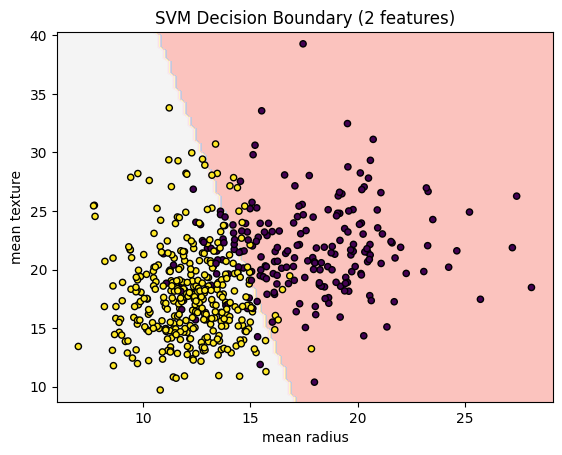

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Use first 2 features for visualization
X_2d = cancer.data[:, :2]

svm = SVC(kernel="linear", C=1)
svm.fit(X_2d, y)

DecisionBoundaryDisplay.from_estimator(
    svm,
    X_2d,
    response_method="predict",
    alpha=0.8,
    cmap="Pastel1",
    xlabel=cancer.feature_names[0],
    ylabel=cancer.feature_names[1],
)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, s=20, edgecolors="k")
plt.title("SVM Decision Boundary (2 features)")
plt.show()

## Full-Feature SVM with Proper Pipeline

Best practice: scale features before SVM (SVM is sensitive to feature scales).

In [5]:
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="linear", C=1)),
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Malignant", "Benign"]))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9736842105263158

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.95      0.98      0.96        42
      Benign       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[41  1]
 [ 2 70]]


## Kernel Comparison

Try different kernels: linear, RBF, polynomial.

In [6]:
kernels = ["linear", "rbf", "poly"]
results = {}

for k in kernels:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC(kernel=k, C=1)),
    ])
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    results[k] = acc
    print(f"{k:10s}: accuracy = {acc:.4f}")

best_kernel = max(results, key=results.get)
print(f"\nBest kernel: {best_kernel}")

linear    : accuracy = 0.9737
rbf       : accuracy = 0.9825
poly      : accuracy = 0.9123

Best kernel: rbf


## Advantages of SVM

1. **High-dimensional performance** — Works well in high-dimensional spaces (e.g., image classification, gene expression)
2. **Nonlinear capability** — Kernels (RBF, polynomial) handle non-linear relationships
3. **Outlier resilience** — Soft margin handles outliers
4. **Binary and multiclass** — Supports both binary and multiclass classification
5. **Memory efficient** — Uses only support vectors, not full dataset

## Disadvantages of SVM

1. **Slow training** — Can be slow on large datasets
2. **Parameter tuning** — Choosing kernel and C requires careful tuning
3. **Noise sensitivity** — Struggles with noisy, overlapping classes
4. **Limited interpretability** — Complex hyperplanes in high dimensions are hard to explain
5. **Feature scaling** — Requires proper scaling (e.g., StandardScaler)


## Practice Questions

### Q1
**What are support vectors?**

**Answer:** The data points closest to the hyperplane. They define the margin and are the only points needed to compute the decision boundary.

---

### Q2
**When would you use a soft margin instead of a hard margin?**

**Answer:** When the data is not perfectly separable, contains outliers, or when you want better generalization (avoid overfitting).

---

### Q3
**What does the kernel trick do?**

**Answer:** It allows SVM to implicitly map data into a higher-dimensional space without explicitly computing the coordinates, enabling non-linear decision boundaries without expensive computation.

---

### Q4
**Why is feature scaling important for SVM?**

**Answer:** SVM uses distance-based computations. Features on different scales can dominate the margin calculation; scaling ensures all features contribute equally.

---

# KNN vs SVM: Which Model is Best?

**Scenario:** 50,000 samples, 10 features, binary classification.

When you have two candidate models, you need a **fair, systematic comparison** — not just accuracy on one split. This section walks through the standard approach:

1. **Same data** — both models see identical train/test splits
2. **Same preprocessing** — both get scaled features (critical for KNN and SVM)
3. **Cross-validation** — multiple splits reduce luck; gives mean + std
4. **Multiple metrics** — accuracy alone can be misleading; also check F1, precision, recall
5. **Timing** — a slightly less accurate model that's 100x faster may be the better choice
6. **Learning curves** — how does performance change as training size grows?

## Step 1: Generate the Dataset

We use `make_classification` to create a controlled binary classification problem.
This lets us know the ground truth and control difficulty via `class_sep` and `flip_y`.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    ConfusionMatrixDisplay,
)

# Generate 50,000 samples, 10 features, binary classification
X, y = make_classification(
    n_samples=50_000,
    n_features=10,
    n_informative=7,       # 7 of 10 features carry signal
    n_redundant=2,         # 2 are linear combos of informative ones
    n_clusters_per_class=2,
    flip_y=0.03,           # 3% label noise — makes it realistic
    class_sep=1.0,
    random_state=42,
)

print(f"Dataset shape: {X.shape}")
print(f"Class distribution: {np.bincount(y)}")
print(f"Class balance: {np.bincount(y) / len(y)}")

Dataset shape: (50000, 10)
Class distribution: [25016 24984]
Class balance: [0.50032 0.49968]


## Step 2: Cross-Validated Comparison (Accuracy + F1 + Timing)

`cross_validate` runs the full pipeline (scale → fit → predict) on each fold, and
records both scores and wall-clock time. This is the fairest way to compare models.

We use `StratifiedKFold` so each fold has the same class ratio.

In [8]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "KNN (k=5)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=5)),
    ]),
    "KNN (k=11)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=11)),
    ]),
    "SVM (linear)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="linear", C=1)),
    ]),
    "SVM (RBF)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="rbf", C=1)),
    ]),
}

scoring = ["accuracy", "f1"]
results = []

for name, pipe in models.items():
    print(f"Running {name}...", end=" ", flush=True)
    cv_results = cross_validate(
        pipe, X, y,
        cv=cv,
        scoring=scoring,
        return_train_score=False,
    )
    results.append({
        "Model": name,
        "Accuracy (mean)": cv_results["test_accuracy"].mean(),
        "Accuracy (std)": cv_results["test_accuracy"].std(),
        "F1 (mean)": cv_results["test_f1"].mean(),
        "F1 (std)": cv_results["test_f1"].std(),
        "Fit time (s)": cv_results["fit_time"].mean(),
        "Predict time (s)": cv_results["score_time"].mean(),
    })
    print(f"done ({cv_results['fit_time'].mean():.1f}s fit, "
          f"{cv_results['score_time'].mean():.1f}s predict)")

results_df = pd.DataFrame(results).set_index("Model")
results_df

Running KNN (k=5)... done (0.0s fit, 0.4s predict)
Running KNN (k=11)... done (0.0s fit, 0.5s predict)
Running SVM (linear)... done (18.3s fit, 1.8s predict)
Running SVM (RBF)... done (4.7s fit, 2.3s predict)


,Accuracy (mean),Accuracy (std),F1 (mean),F1 (std),Fit time (s),Predict time (s)
Model,,,,,,
KNN (k=5),0.93332,0.001389,0.932280,0.001392,0.017416,0.394902
KNN (k=11),0.93520,0.001185,0.934057,0.001203,0.018807,0.509588
SVM (linear),0.77672,0.004553,0.771275,0.004597,18.291847,1.828500
SVM (RBF),0.93334,0.001950,0.932420,0.002029,4.701503,2.253190


## Step 3: Visualize the Comparison

Bar charts make it easy to compare accuracy, F1, and speed side by side.

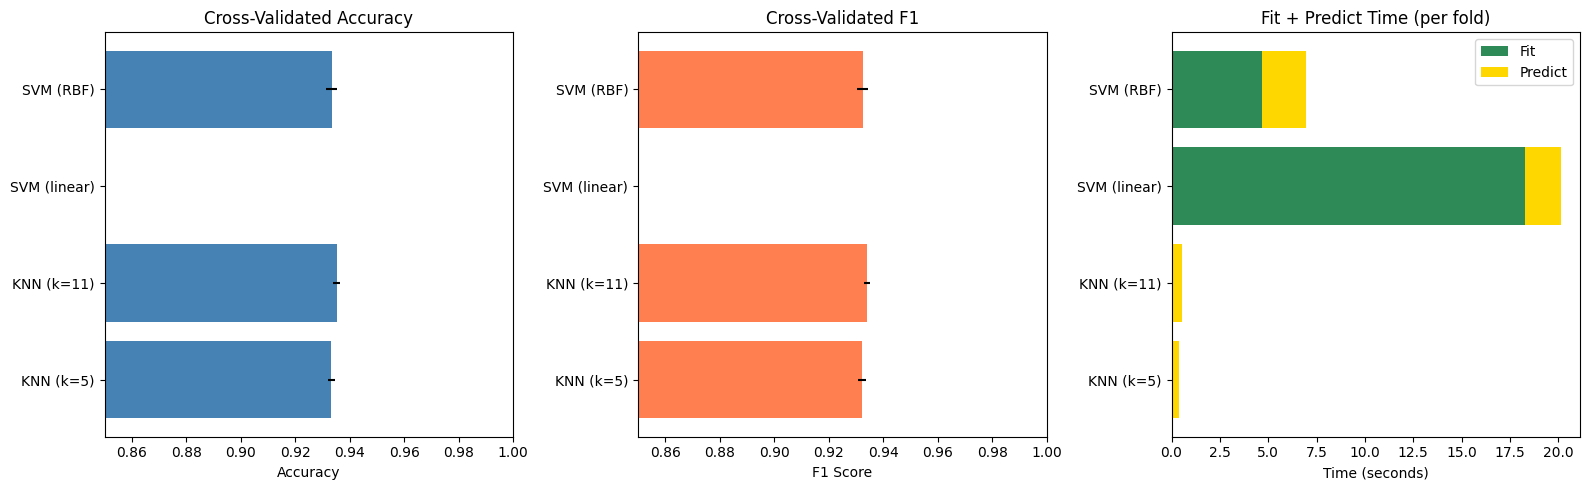

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Accuracy
axes[0].barh(results_df.index, results_df["Accuracy (mean)"], xerr=results_df["Accuracy (std)"], color="steelblue")
axes[0].set_xlim(0.85, 1.0)
axes[0].set_xlabel("Accuracy")
axes[0].set_title("Cross-Validated Accuracy")

# F1
axes[1].barh(results_df.index, results_df["F1 (mean)"], xerr=results_df["F1 (std)"], color="coral")
axes[1].set_xlim(0.85, 1.0)
axes[1].set_xlabel("F1 Score")
axes[1].set_title("Cross-Validated F1")

# Timing (log scale — SVM can be much slower)
axes[2].barh(results_df.index, results_df["Fit time (s)"], color="seagreen", label="Fit")
axes[2].barh(results_df.index, results_df["Predict time (s)"],
             left=results_df["Fit time (s)"], color="gold", label="Predict")
axes[2].set_xlabel("Time (seconds)")
axes[2].set_title("Fit + Predict Time (per fold)")
axes[2].legend()

plt.tight_layout()
plt.show()

## Step 4: Confusion Matrices Side by Side

Confusion matrices reveal *where* each model makes mistakes — not just how often.

In [ ]:
# Single train/test split for confusion matrices
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_knn = Pipeline([("scaler", StandardScaler()), ("clf", KNeighborsClassifier(n_neighbors=11))])
best_svm = Pipeline([("scaler", StandardScaler()), ("clf", SVC(kernel="rbf", C=1))])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, model, name in zip(axes, [best_knn, best_svm], ["KNN (k=11)", "SVM (RBF)"]):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred,
        display_labels=["Class 0", "Class 1"],
        cmap="Blues",
        ax=ax,
    )
    ax.set_title(f"{name}\nAccuracy={acc:.4f}, F1={f1:.4f}")

plt.tight_layout()
plt.show()

## Step 5: Learning Curves — How Do They Scale?

Learning curves show how train/test performance changes as we add more training data.
This reveals:
- **Overfitting:** big gap between train and test scores
- **Underfitting:** both scores are low
- **Data hunger:** whether adding more data would help

In [ ]:
from sklearn.model_selection import learning_curve

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

models_lc = {
    "KNN (k=11)": Pipeline([("scaler", StandardScaler()), ("clf", KNeighborsClassifier(n_neighbors=11))]),
    "SVM (RBF)": Pipeline([("scaler", StandardScaler()), ("clf", SVC(kernel="rbf", C=1))]),
}

train_sizes = np.array([500, 1000, 2500, 5000, 10000, 20000, 40000])

for ax, (name, model) in zip(axes, models_lc.items()):
    train_sizes_abs, train_scores, test_scores = learning_curve(
        model, X, y,
        train_sizes=train_sizes,
        cv=3,
        scoring="accuracy",
        n_jobs=-1,
    )

    ax.plot(train_sizes_abs, train_scores.mean(axis=1), "o-", label="Train", color="steelblue")
    ax.plot(train_sizes_abs, test_scores.mean(axis=1), "o-", label="Test", color="coral")
    ax.fill_between(train_sizes_abs,
                     train_scores.mean(axis=1) - train_scores.std(axis=1),
                     train_scores.mean(axis=1) + train_scores.std(axis=1), alpha=0.15)
    ax.fill_between(train_sizes_abs,
                     test_scores.mean(axis=1) - test_scores.std(axis=1),
                     test_scores.mean(axis=1) + test_scores.std(axis=1), alpha=0.15)
    ax.set_title(f"Learning Curve: {name}")
    ax.set_xlabel("Training set size")
    ax.set_ylabel("Accuracy")
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Step 6: Prediction Speed Test

In production, prediction speed often matters more than training speed.
KNN has **no training** but **slow prediction** (must compute distances to all training points).
SVM trains once and predicts fast (only uses support vectors).

In [ ]:
timing_models = {
    "KNN (k=11)": Pipeline([("scaler", StandardScaler()), ("clf", KNeighborsClassifier(n_neighbors=11))]),
    "SVM (RBF)": Pipeline([("scaler", StandardScaler()), ("clf", SVC(kernel="rbf", C=1))]),
}

timing_results = []

for name, model in timing_models.items():
    # Training time
    start = time.perf_counter()
    model.fit(X_train, y_train)
    train_time = time.perf_counter() - start

    # Prediction time on full test set
    start = time.perf_counter()
    y_pred = model.predict(X_test)
    pred_time = time.perf_counter() - start

    # Single-sample prediction (simulates real-time serving)
    single = X_test[:1]
    start = time.perf_counter()
    for _ in range(100):
        model.predict(single)
    single_time = (time.perf_counter() - start) / 100

    timing_results.append({
        "Model": name,
        "Train (s)": round(train_time, 3),
        f"Predict {len(X_test)} samples (s)": round(pred_time, 3),
        "Predict 1 sample (ms)": round(single_time * 1000, 3),
    })

pd.DataFrame(timing_results).set_index("Model")

## Summary: KNN vs SVM at 50K Samples / 10 Features

| Criterion | KNN | SVM (RBF) |
|-----------|-----|-----------|
| **Training speed** | Near-instant (just stores data) | Slower (solves optimization) |
| **Prediction speed** | Slow — must scan all 50K points | Fast — only uses support vectors |
| **Accuracy** | Good, but plateaus | Typically higher on clean boundaries |
| **Handles noise** | Sensitive (especially small k) | More robust (soft margin + C) |
| **Scaling with n** | Prediction time grows linearly with n | Training time grows ~O(n²) to O(n³) |
| **Feature scaling** | Required | Required |

### Decision Framework

Choose **SVM** when:
- You need fast predictions at serving time
- Data has clear (possibly non-linear) decision boundaries
- You can afford longer training

Choose **KNN** when:
- You want simplicity and interpretability
- The dataset is small enough that prediction speed isn't an issue
- You need to quickly prototype without tuning many hyperparameters

### The Real Answer
**Run the comparison on YOUR data.** The "best" model depends on your specific dataset,
noise level, class balance, and deployment constraints. The framework above (cross-validation
+ timing + learning curves) is the systematic way to answer "which is best?" for any pair of models.